In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from curses import window
from math import isnan
import matplotlib.pyplot as plt 

df = pd.read_csv('./modified_data/resample_data.csv',index_col=0)
df.index = pd.to_datetime(df.index)
# df = df.iloc[:200,:]

plt.figure(figsize=(10,6), dpi=300)
flat_values = df.values.flatten().tolist()
# flat_values = [(a - b) if not (np.isnan(a) or np.isnan(b)) else np.nan for a, b in zip(flat_values, flat_values[1:])]
window_size = 24
num_list = 0
group = 0
availability = []
valid_profiles = []

# for i in range(int(len(flat_values)/window_size)):
for i in range(len(flat_values)-window_size):
    # chunk = flat_values[i*window_size : i*window_size + window_size]
    chunk = flat_values[i : i + window_size]
    if any(isnan(k) for k in chunk):
        availability.append(0) 
        continue
    availability.append(1) 
    clean_lst = np.array([int(k) for k in chunk])
    diff_lst = np.array([-clean_lst[i+1]+clean_lst[i] for i in range(len(clean_lst)-1)])
    num_list += 1
    if availability[i-1] == 0:
        group += 1
    print(f"Group {group} - {num_list}/{i} {clean_lst.tolist()}")
    valid_profiles.append(clean_lst.tolist())

    # plt.plot(diff_lst, alpha = 0.2, color = 'k')

Group 0 - 1/0 [46, 45, 44, 45, 44, 48, 49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38]
Group 0 - 2/1 [45, 44, 45, 44, 48, 49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44]
Group 0 - 3/2 [44, 45, 44, 48, 49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42]
Group 0 - 4/3 [45, 44, 48, 49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42, 46]
Group 0 - 5/4 [44, 48, 49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42, 46, 49]
Group 0 - 6/5 [48, 49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42, 46, 49, 50]
Group 0 - 7/6 [49, 50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42, 46, 49, 50, 50]
Group 0 - 8/7 [50, 46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42, 46, 49, 50, 50, 47]
Group 0 - 9/8 [46, 44, 41, 32, 39, 40, 36, 38, 37, 37, 43, 45, 38, 35, 31, 38, 44, 42, 46, 49, 50, 50, 47, 43]
G

<Figure size 3000x1800 with 0 Axes>

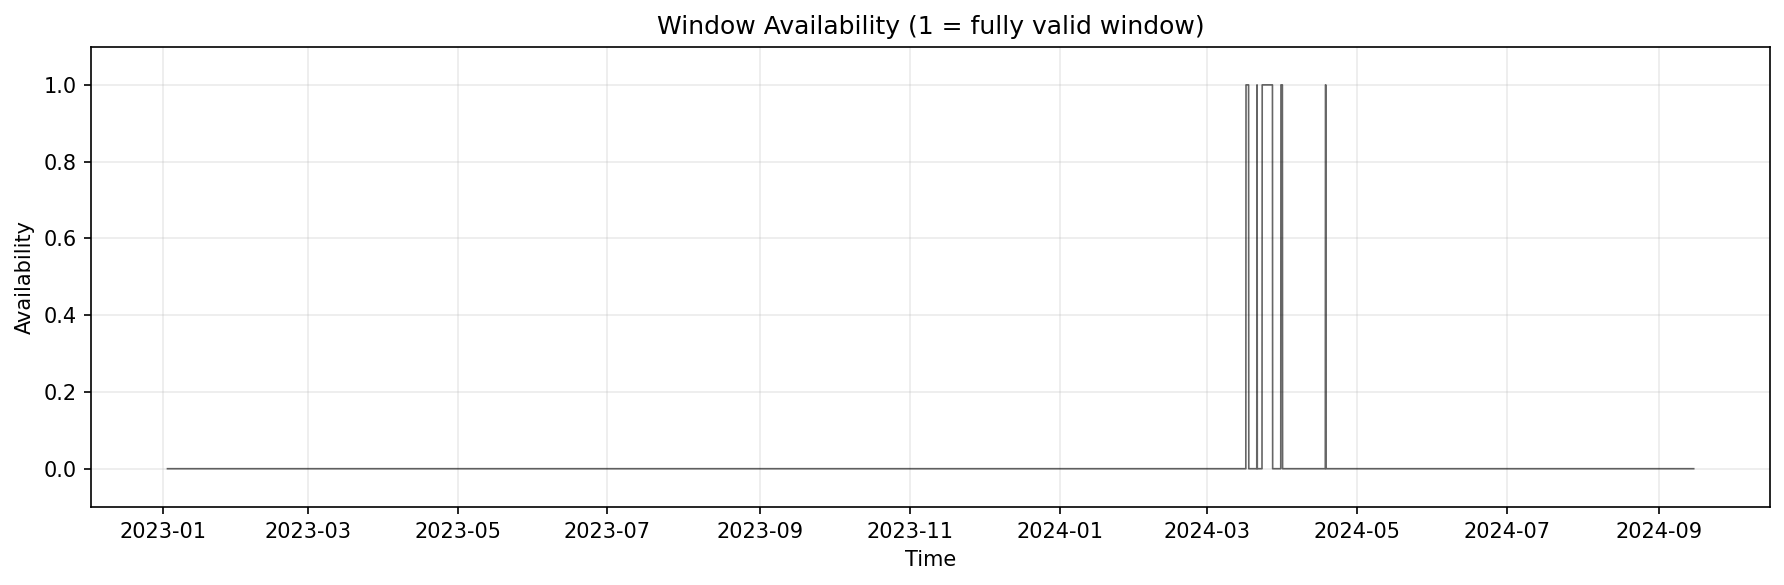

In [3]:
plt.figure(figsize=(12,4), dpi=150)
# align x to availability (availability length = len(df.index) - window_size)
x = df.index[window_size:window_size + len(availability)]
plt.plot(x, availability, alpha=0.6, color='k', linewidth=0.8)
plt.title('Window Availability (1 = fully valid window)')
plt.xlabel('Time')
plt.ylabel('Availability')
plt.ylim(-0.1, 1.1)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

Collected 153 valid days.


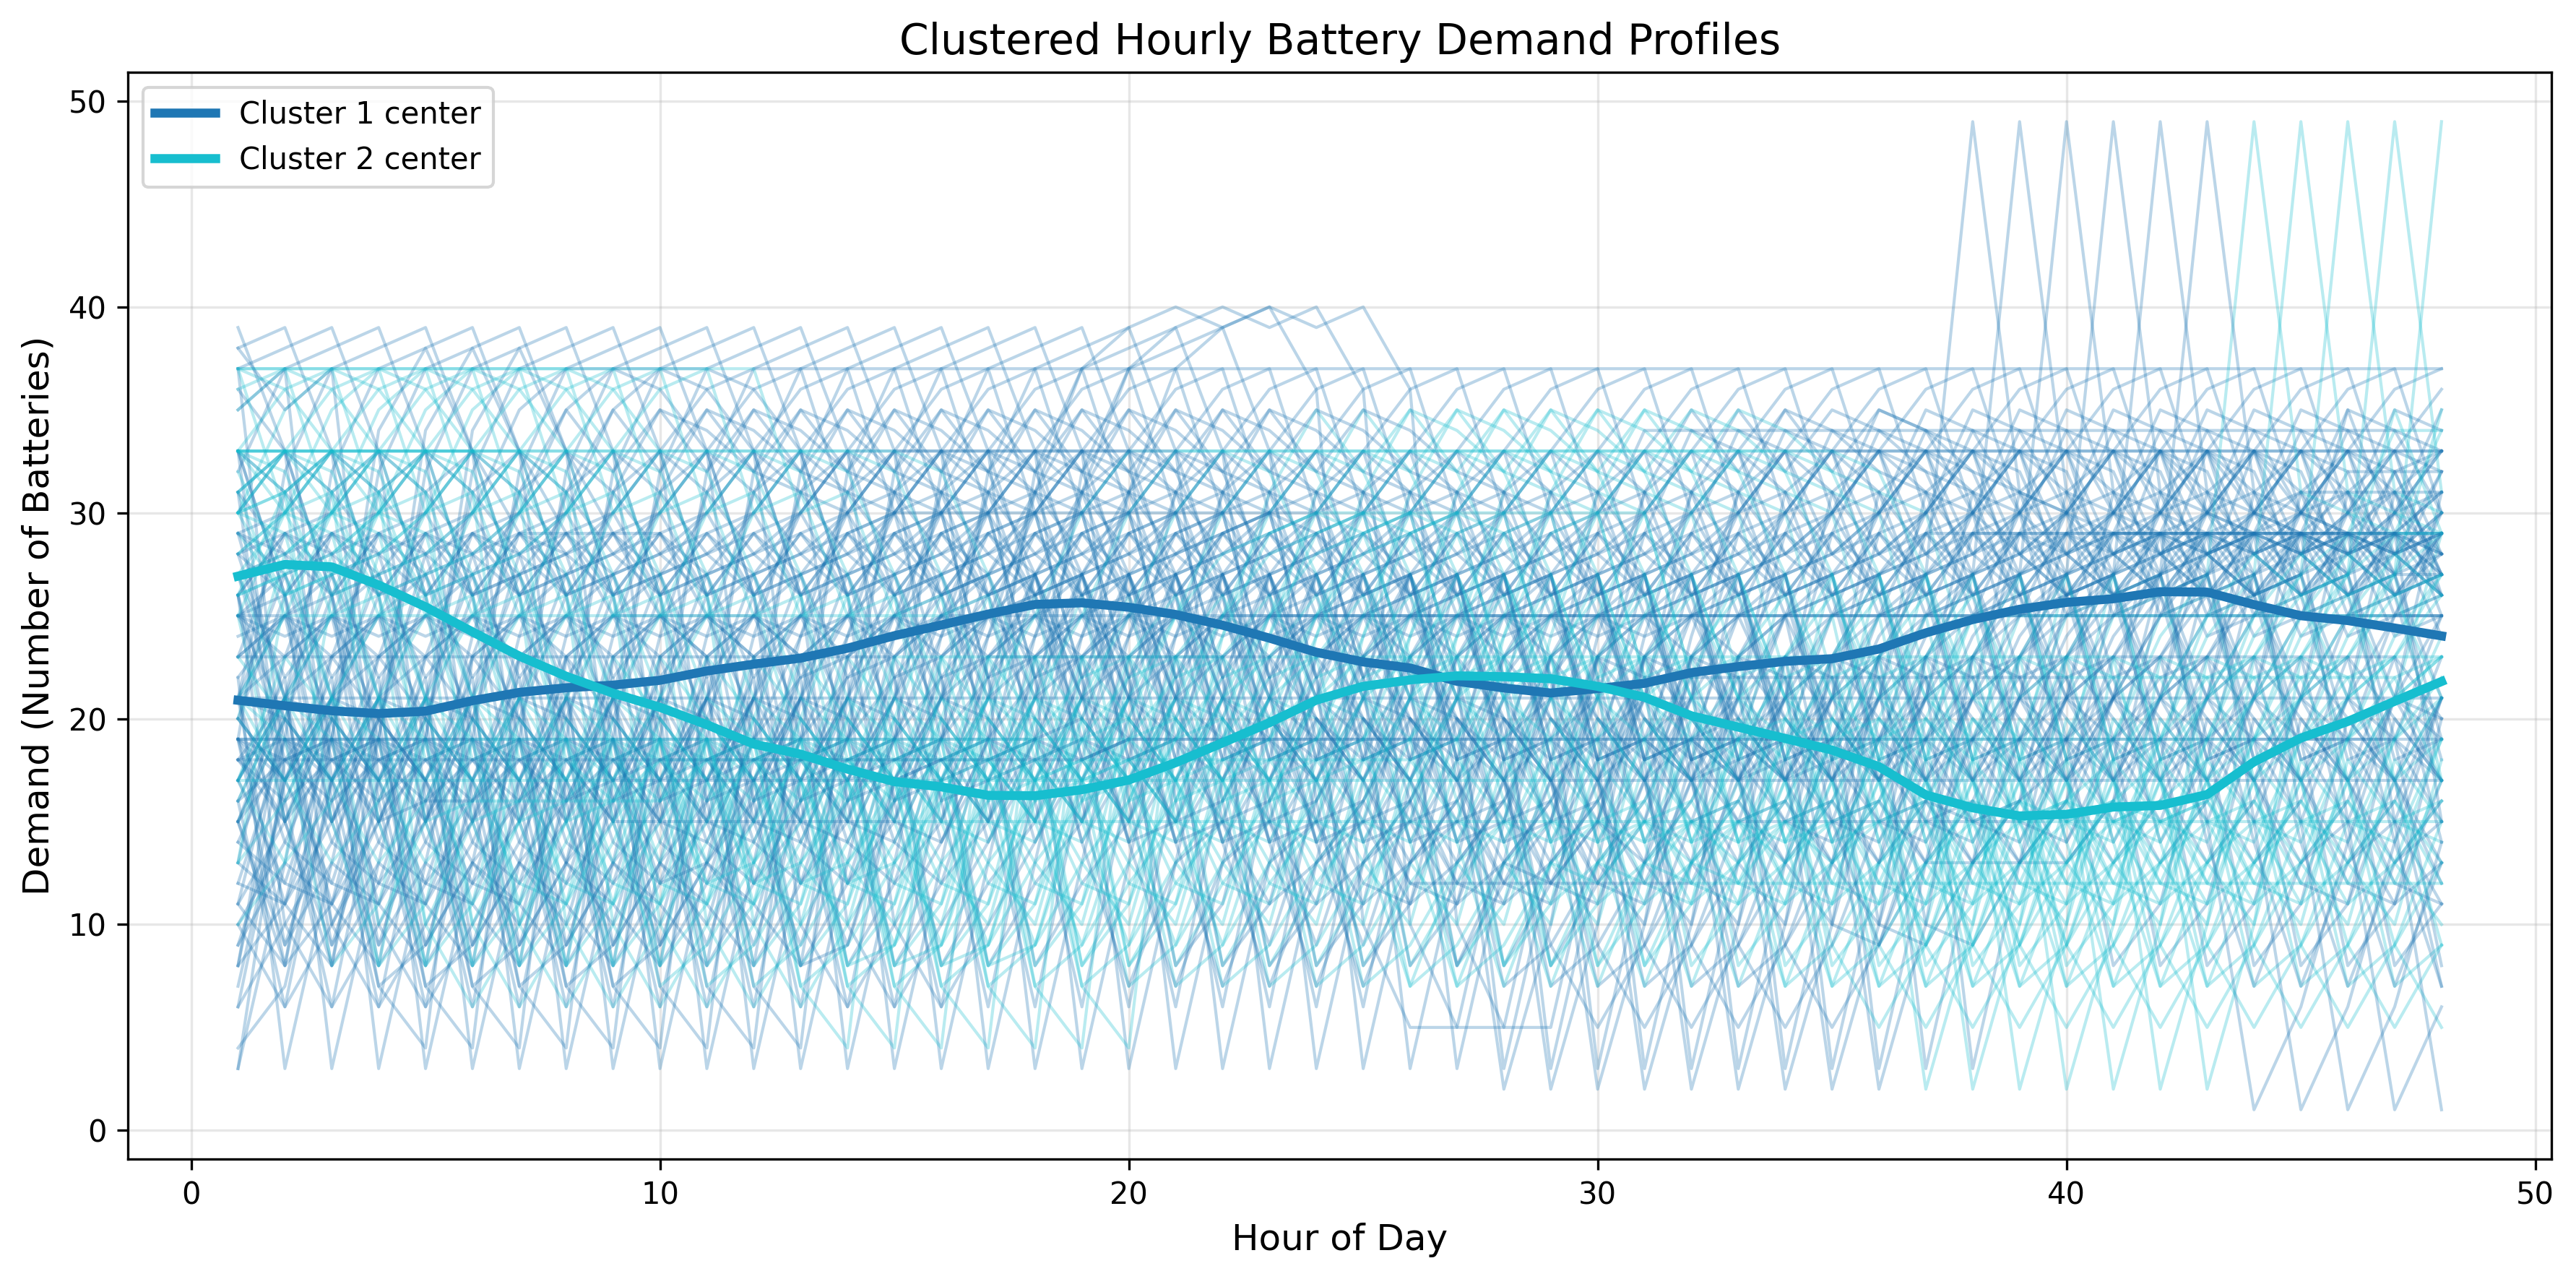

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isnan
from sklearn.cluster import KMeans

# Convert to numpy array for clustering
X = np.array(valid_profiles)
print(f"Collected {X.shape[0]} valid days.")

# Cluster them (e.g., 3 groups)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
# generate n_clusters distinct hex color codes using a matplotlib colormap
cmap = plt.get_cmap('tab10')
colors = ['#%02x%02x%02x' % tuple(int(255*c) for c in cmap(v)[:3]) for v in np.linspace(0, 1, n_clusters)]

for i in range(X.shape[0]):
    plt.plot(range(1, 1+window_size), X[i], alpha=0.3, color=colors[labels[i]], linewidth=1)

# Add cluster centers for reference
for idx, center in enumerate(kmeans.cluster_centers_):
    plt.plot(range(1, 1+window_size), center, color=colors[idx], linewidth=3, label=f'Cluster {idx+1} center')

# Labels and title
plt.title('Clustered Hourly Battery Demand Profiles', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Demand (Number of Batteries)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:
print(df.index.tolist()[24:24+24])

[Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-02 01:00:00'), Timestamp('2023-01-02 02:00:00'), Timestamp('2023-01-02 03:00:00'), Timestamp('2023-01-02 04:00:00'), Timestamp('2023-01-02 05:00:00'), Timestamp('2023-01-02 06:00:00'), Timestamp('2023-01-02 07:00:00'), Timestamp('2023-01-02 08:00:00'), Timestamp('2023-01-02 09:00:00'), Timestamp('2023-01-02 10:00:00'), Timestamp('2023-01-02 11:00:00'), Timestamp('2023-01-02 12:00:00'), Timestamp('2023-01-02 13:00:00'), Timestamp('2023-01-02 14:00:00'), Timestamp('2023-01-02 15:00:00'), Timestamp('2023-01-02 16:00:00'), Timestamp('2023-01-02 17:00:00'), Timestamp('2023-01-02 18:00:00'), Timestamp('2023-01-02 19:00:00'), Timestamp('2023-01-02 20:00:00'), Timestamp('2023-01-02 21:00:00'), Timestamp('2023-01-02 22:00:00'), Timestamp('2023-01-02 23:00:00')]


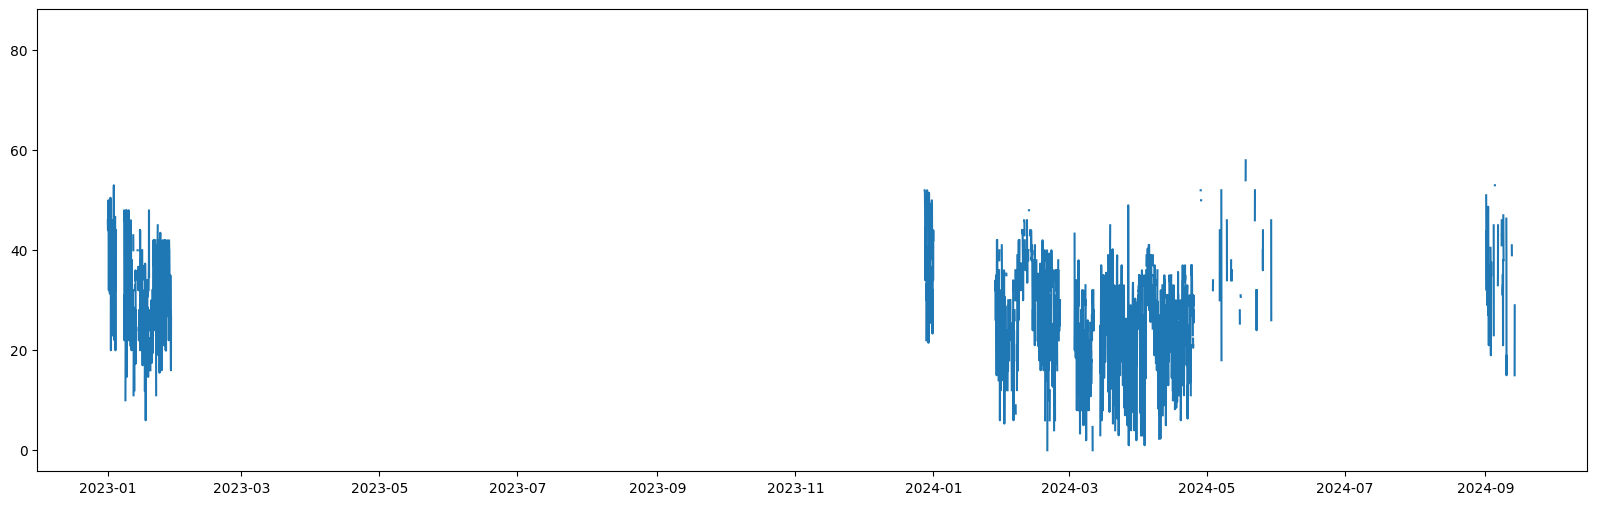

In [6]:
plt.figure(figsize=(20,6))
plt.plot(df.index,df.values)